In [8]:

import tensorflow as tf

from tensorflow import keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import matplotlib.pyplot as plt

In [9]:


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('./data/',
                                                    batch_size=8,
                                                    classes=['with_mask','without_mask'],
                                                    target_size=(150, 150))

Found 7553 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 129600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mse','acc'])

In [12]:
es = EarlyStopping(monitor="acc", patience=20, verbose=1, mode="auto")

In [13]:
history = model.fit(train_generator,
                              epochs=3,
                              # validation_data=validation_generator,
                              steps_per_epoch=len(train_generator),
                              callbacks=[es])

Epoch 1/3
247/945 [======>.......................] - ETA: 32s - loss: 0.5721 - mse: 0.1883 - acc: 0.7308

d:\Anaconda\envs\COMP9444\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


945/945 [==============================] - 41s 43ms/step - loss: 0.4832 - mse: 0.1621 - acc: 0.7761
Epoch 2/3
945/945 [==============================] - 41s 44ms/step - loss: 0.4262 - mse: 0.1395 - acc: 0.8097
Epoch 3/3
945/945 [==============================] - 42s 44ms/step - loss: 0.3855 - mse: 0.1247 - acc: 0.8358


AttributeError: 'Figure' object has no attribute 'subtitle'

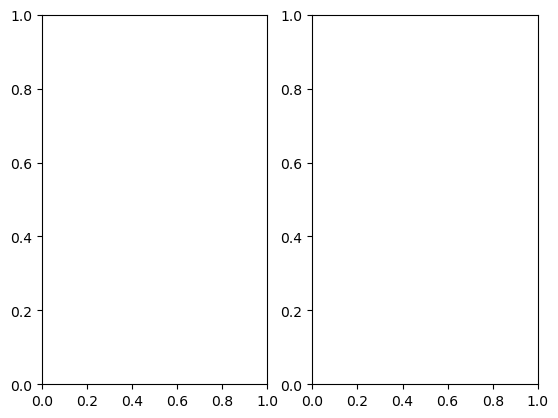

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subtitle('loss and acc')
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train acc')
fig.legend()
fig.show()